In [1]:
#importing necessary libraries
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#loading the fashion mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 1us/step


In [6]:
#Number of classes
y_train = np.array(y_train)
print("Number of Classes: ",len(np.unique(y_train)))
print("Classes: ", np.unique(y_train))

Number of Classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


In [7]:
#Dimension of images
x_train[0].shape

(28, 28)

In [8]:
#Min-Max Normalization
x_train = np.array(x_train)
x_train = x_train/255

In [14]:
#FCNN
fcnn = tf.keras.Sequential()
fcnn.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
fcnn.add(tf.keras.layers.Dense(128, activation = 'relu'))
fcnn.add(tf.keras.layers.Dropout(0.2))
fcnn.add(tf.keras.layers.Dense(64, activation = 'relu'))
fcnn.add(tf.keras.layers.Dropout(0.2))
fcnn.add(tf.keras.layers.Dense(32, activation = 'relu'))
fcnn.add(tf.keras.layers.Dropout(0.2))
fcnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
fcnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
fcnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

In [16]:
history = fcnn.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

Epoch 1/20


2023-08-14 22:44:18.940831: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 21s 11ms/step - loss: 1.2833 - accuracy: 0.6600 - val_loss: 0.9273 - val_accuracy: 0.7228
Epoch 2/20
1500/1500 [==============================] - 20s 13ms/step - loss: 1.2196 - accuracy: 0.7201 - val_loss: 1.3506 - val_accuracy: 0.7457
Epoch 3/20
 836/1500 [===============>..............] - ETA: 7s - loss: 3.9944 - accuracy: 0.6492

KeyboardInterrupt: 

In [11]:
loss, accuracy = fcnn.evaluate(x_test/255, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.3751 - accuracy: 0.8861
Test Loss: 0.37514397501945496
Test Accuracy: 0.8860999941825867


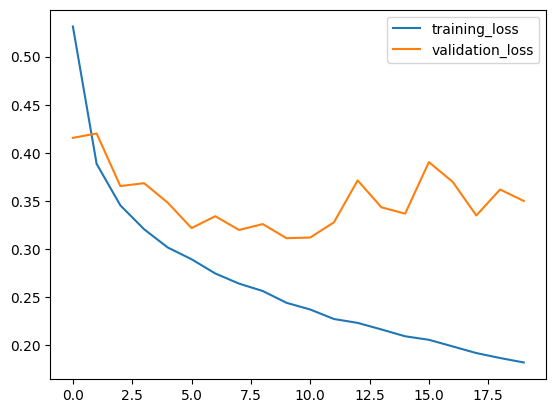

In [12]:
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

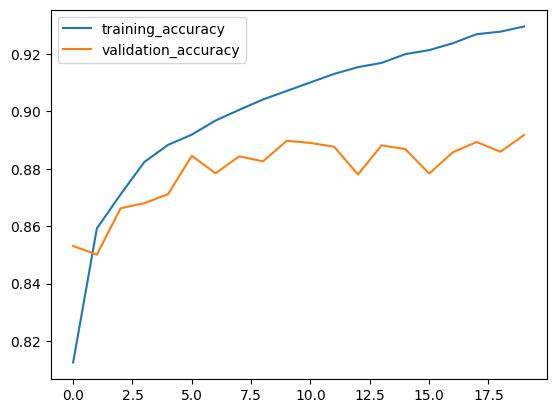

In [13]:
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()

In [30]:
cnn1 = tf.keras.Sequential()
cnn1.add(tf.keras.layers.Conv2D(32, (5, 5), strides = (1, 1), padding = "valid" , activation ='relu', input_shape = (28, 28, 1)))
cnn1.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(100, activation = 'relu'))
cnn1.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [31]:
cnn1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               460900    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462742 (1.77 MB)
Trainable params: 462742 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [32]:
history = cnn1.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4413 - accuracy: 0.8436 - val_loss: 0.3432 - val_accuracy: 0.8736
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3021 - accuracy: 0.8905 - val_loss: 0.3156 - val_accuracy: 0.8852
Epoch 3/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2559 - accuracy: 0.9071 - val_loss: 0.2788 - val_accuracy: 0.9002
Epoch 4/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2224 - accuracy: 0.9175 - val_loss: 0.2597 - val_accuracy: 0.9062
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1962 - accuracy: 0.9270 - val_loss: 0.2440 - val_accuracy: 0.9131
Epoch 6/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1687 - accuracy: 0.9366 - val_loss: 0.2781 - val_accuracy: 0.9069
Epoch 7/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1498 - accuracy: 0.9440 - val_loss: 0.2659 - val_accuracy:

In [33]:
loss, accuracy = cnn1.evaluate(x_test/255, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.9110 - accuracy: 0.9064
Test Loss: 0.9110061526298523
Test Accuracy: 0.9064000248908997


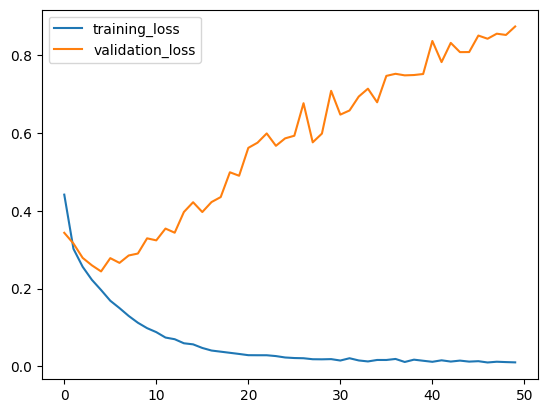

In [34]:
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

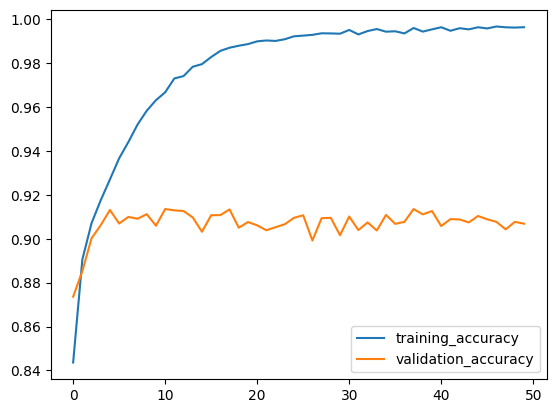

In [35]:
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()

In [58]:
cnn2 = tf.keras.Sequential()
cnn2.add(tf.keras.layers.Conv2D(64, (3, 3), strides = (1, 1), padding = "valid" , activation ='relu', input_shape = (28, 28, 1)))
# cnn2.add(tf.keras.layers.Dropout(0.2))
cnn2.add(tf.keras.layers.Conv2D(32, (3, 3), strides = (1, 1), padding = "valid" , activation ='relu'))
cnn2.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.Dense(64, activation = 'relu'))
cnn2.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [59]:
cnn2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 4608)              0         
                                                                 
 dense_18 (Dense)            (None, 64)                294976    
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                     

In [60]:
history = cnn2.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

Epoch 1/20
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4086 - accuracy: 0.8534 - val_loss: 0.3228 - val_accuracy: 0.8847
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2634 - accuracy: 0.9037 - val_loss: 0.2666 - val_accuracy: 0.9031
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2151 - accuracy: 0.9205 - val_loss: 0.2606 - val_accuracy: 0.9073
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1782 - accuracy: 0.9339 - val_loss: 0.2352 - val_accuracy: 0.9166
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1475 - accuracy: 0.9451 - val_loss: 0.2305 - val_accuracy: 0.9203
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1211 - accuracy: 0.9551 - val_loss: 0.2488 - val_accuracy: 0.9176
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0973 - accuracy: 0.9638 - val_loss: 0.2637 - val_accuracy:

In [61]:
loss, accuracy = cnn2.evaluate(x_test/255, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.6424 - accuracy: 0.9164
Test Loss: 0.6423541307449341
Test Accuracy: 0.9164000153541565


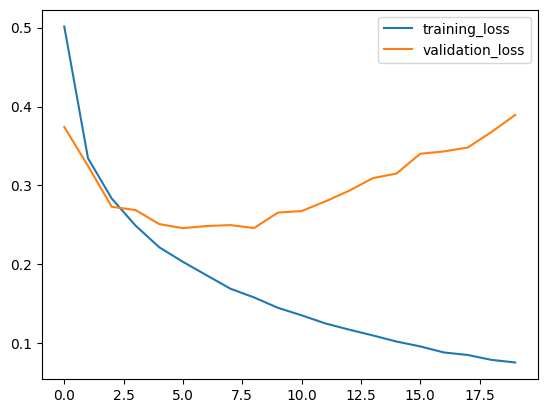

In [52]:
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

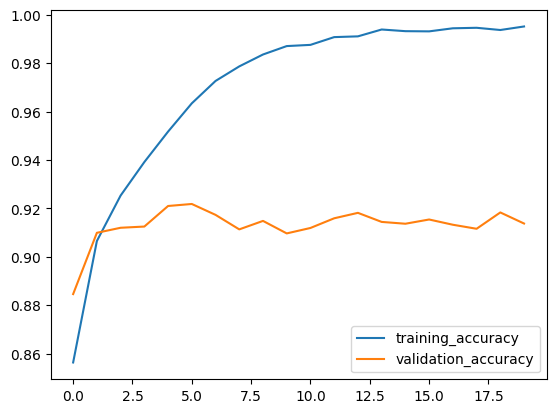

In [41]:
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()